In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling
import seaborn as sns
import matplotlib.ticker as ticker

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import  LinearRegression, Ridge, Lasso
from sklearn.linear_model import LassoCV, RidgeCV,Lasso, Ridge,ElasticNet

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/reddyprasade/Machine-Learning-Problems-DataSets/master/Regression/IPL2013.csv')

In [3]:
data.head()

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,...,0.00,0,307,15,20.47,8.90,13.93,2009,50000,50000
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,...,0.00,0,29,0,0.00,14.50,0.00,2008,50000,50000
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62,...,121.01,5,1059,29,36.52,8.81,24.90,2008,200000,350000
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,...,76.32,0,1125,49,22.96,6.23,22.14,2011,100000,850000
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,...,120.71,28,0,0,0.00,0.00,0.00,2011,100000,800000


In [4]:
data.tail()

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
125,126,"Yadav, AS",2,IND,DC,Batsman,0,0,0,0.00,...,125.64,2,0,0,0.00,0.00,0.00,2010,50000,750000
126,127,Younis Khan,2,PAK,RR,Batsman,6398,7,6814,75.78,...,42.85,0,0,0,0.00,0.00,0.00,2008,225000,225000
127,128,Yuvraj Singh,2,IND,KXIP+,Batsman,1775,9,8051,87.58,...,131.88,67,569,23,24.74,7.02,21.13,2011,400000,1800000
128,129,Zaheer Khan,2,IND,MI+,Bowler,1114,288,790,73.55,...,91.67,1,1783,65,27.43,7.75,21.26,2008,200000,450000
129,130,"Zoysa, DNT",2,SL,DC,Bowler,288,64,343,95.81,...,122.22,0,99,2,49.50,9.00,33.00,2008,100000,110000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 26 columns):
Sl.NO.           130 non-null int64
PLAYER NAME      130 non-null object
AGE              130 non-null int64
COUNTRY          130 non-null object
TEAM             130 non-null object
PLAYING ROLE     130 non-null object
T-RUNS           130 non-null int64
T-WKTS           130 non-null int64
ODI-RUNS-S       130 non-null int64
ODI-SR-B         130 non-null float64
ODI-WKTS         130 non-null int64
ODI-SR-BL        130 non-null float64
CAPTAINCY EXP    130 non-null int64
RUNS-S           130 non-null int64
HS               130 non-null int64
AVE              130 non-null float64
SR-B             130 non-null float64
SIXERS           130 non-null int64
RUNS-C           130 non-null int64
WKTS             130 non-null int64
AVE-BL           130 non-null float64
ECON             130 non-null float64
SR-BL            130 non-null float64
AUCTION YEAR     130 non-null int64
BASE PRICE   

In [6]:
data.describe()

,Sl.NO.,AGE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,CAPTAINCY EXP,RUNS-S,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,...,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,1.300000e+02,1.300000e+02
mean,65.500000,2.092308,2166.715385,66.530769,2508.738462,71.164385,76.076923,34.033846,0.315385,514.246154,...,111.053462,17.692308,475.523077,17.169231,23.110231,6.204462,17.382615,2009.092308,1.922308e+05,5.212231e+05
std,37.671829,0.576627,3305.646757,142.676855,3582.205625,25.898440,111.205070,26.751749,0.466466,615.226335,...,35.928907,23.828146,558.314049,21.816763,20.802057,4.941531,15.273422,1.377821,1.530973e+05,4.068074e+05
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,2.000000e+04,2.000000e+04
25%,33.250000,2.000000,25.500000,0.000000,73.250000,65.650000,0.000000,0.000000,0.000000,39.000000,...,98.237500,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,1.000000e+05,2.250000e+05
50%,65.500000,2.000000,542.500000,7.000000,835.000000,78.225000,18.500000,36.600000,0.000000,172.000000,...,118.510000,6.000000,297.000000,8.500000,24.785000,7.380000,19.935000,2008.000000,2.000000e+05,4.375000e+05
75%,97.750000,2.000000,3002.250000,47.500000,3523.500000,86.790000,106.000000,45.325000,1.000000,925.250000,...,129.102500,29.750000,689.250000,23.750000,35.580000,8.247500,26.212500,2011.000000,2.250000e+05,7.000000e+05
max,130.000000,3.000000,15470.000000,800.000000,18426.000000,116.660000,534.000000,150.000000,1.000000,2254.000000,...,235.490000,129.000000,1975.000000,83.000000,126.300000,38.110000,100.200000,2011.000000,1.350000e+06,1.800000e+06


In [7]:
data.isnull().sum()

Sl.NO.           0
PLAYER NAME      0
AGE              0
COUNTRY          0
TEAM             0
PLAYING ROLE     0
T-RUNS           0
T-WKTS           0
ODI-RUNS-S       0
ODI-SR-B         0
ODI-WKTS         0
ODI-SR-BL        0
CAPTAINCY EXP    0
RUNS-S           0
HS               0
AVE              0
SR-B             0
SIXERS           0
RUNS-C           0
WKTS             0
AVE-BL           0
ECON             0
SR-BL            0
AUCTION YEAR     0
BASE PRICE       0
SOLD PRICE       0
dtype: int64

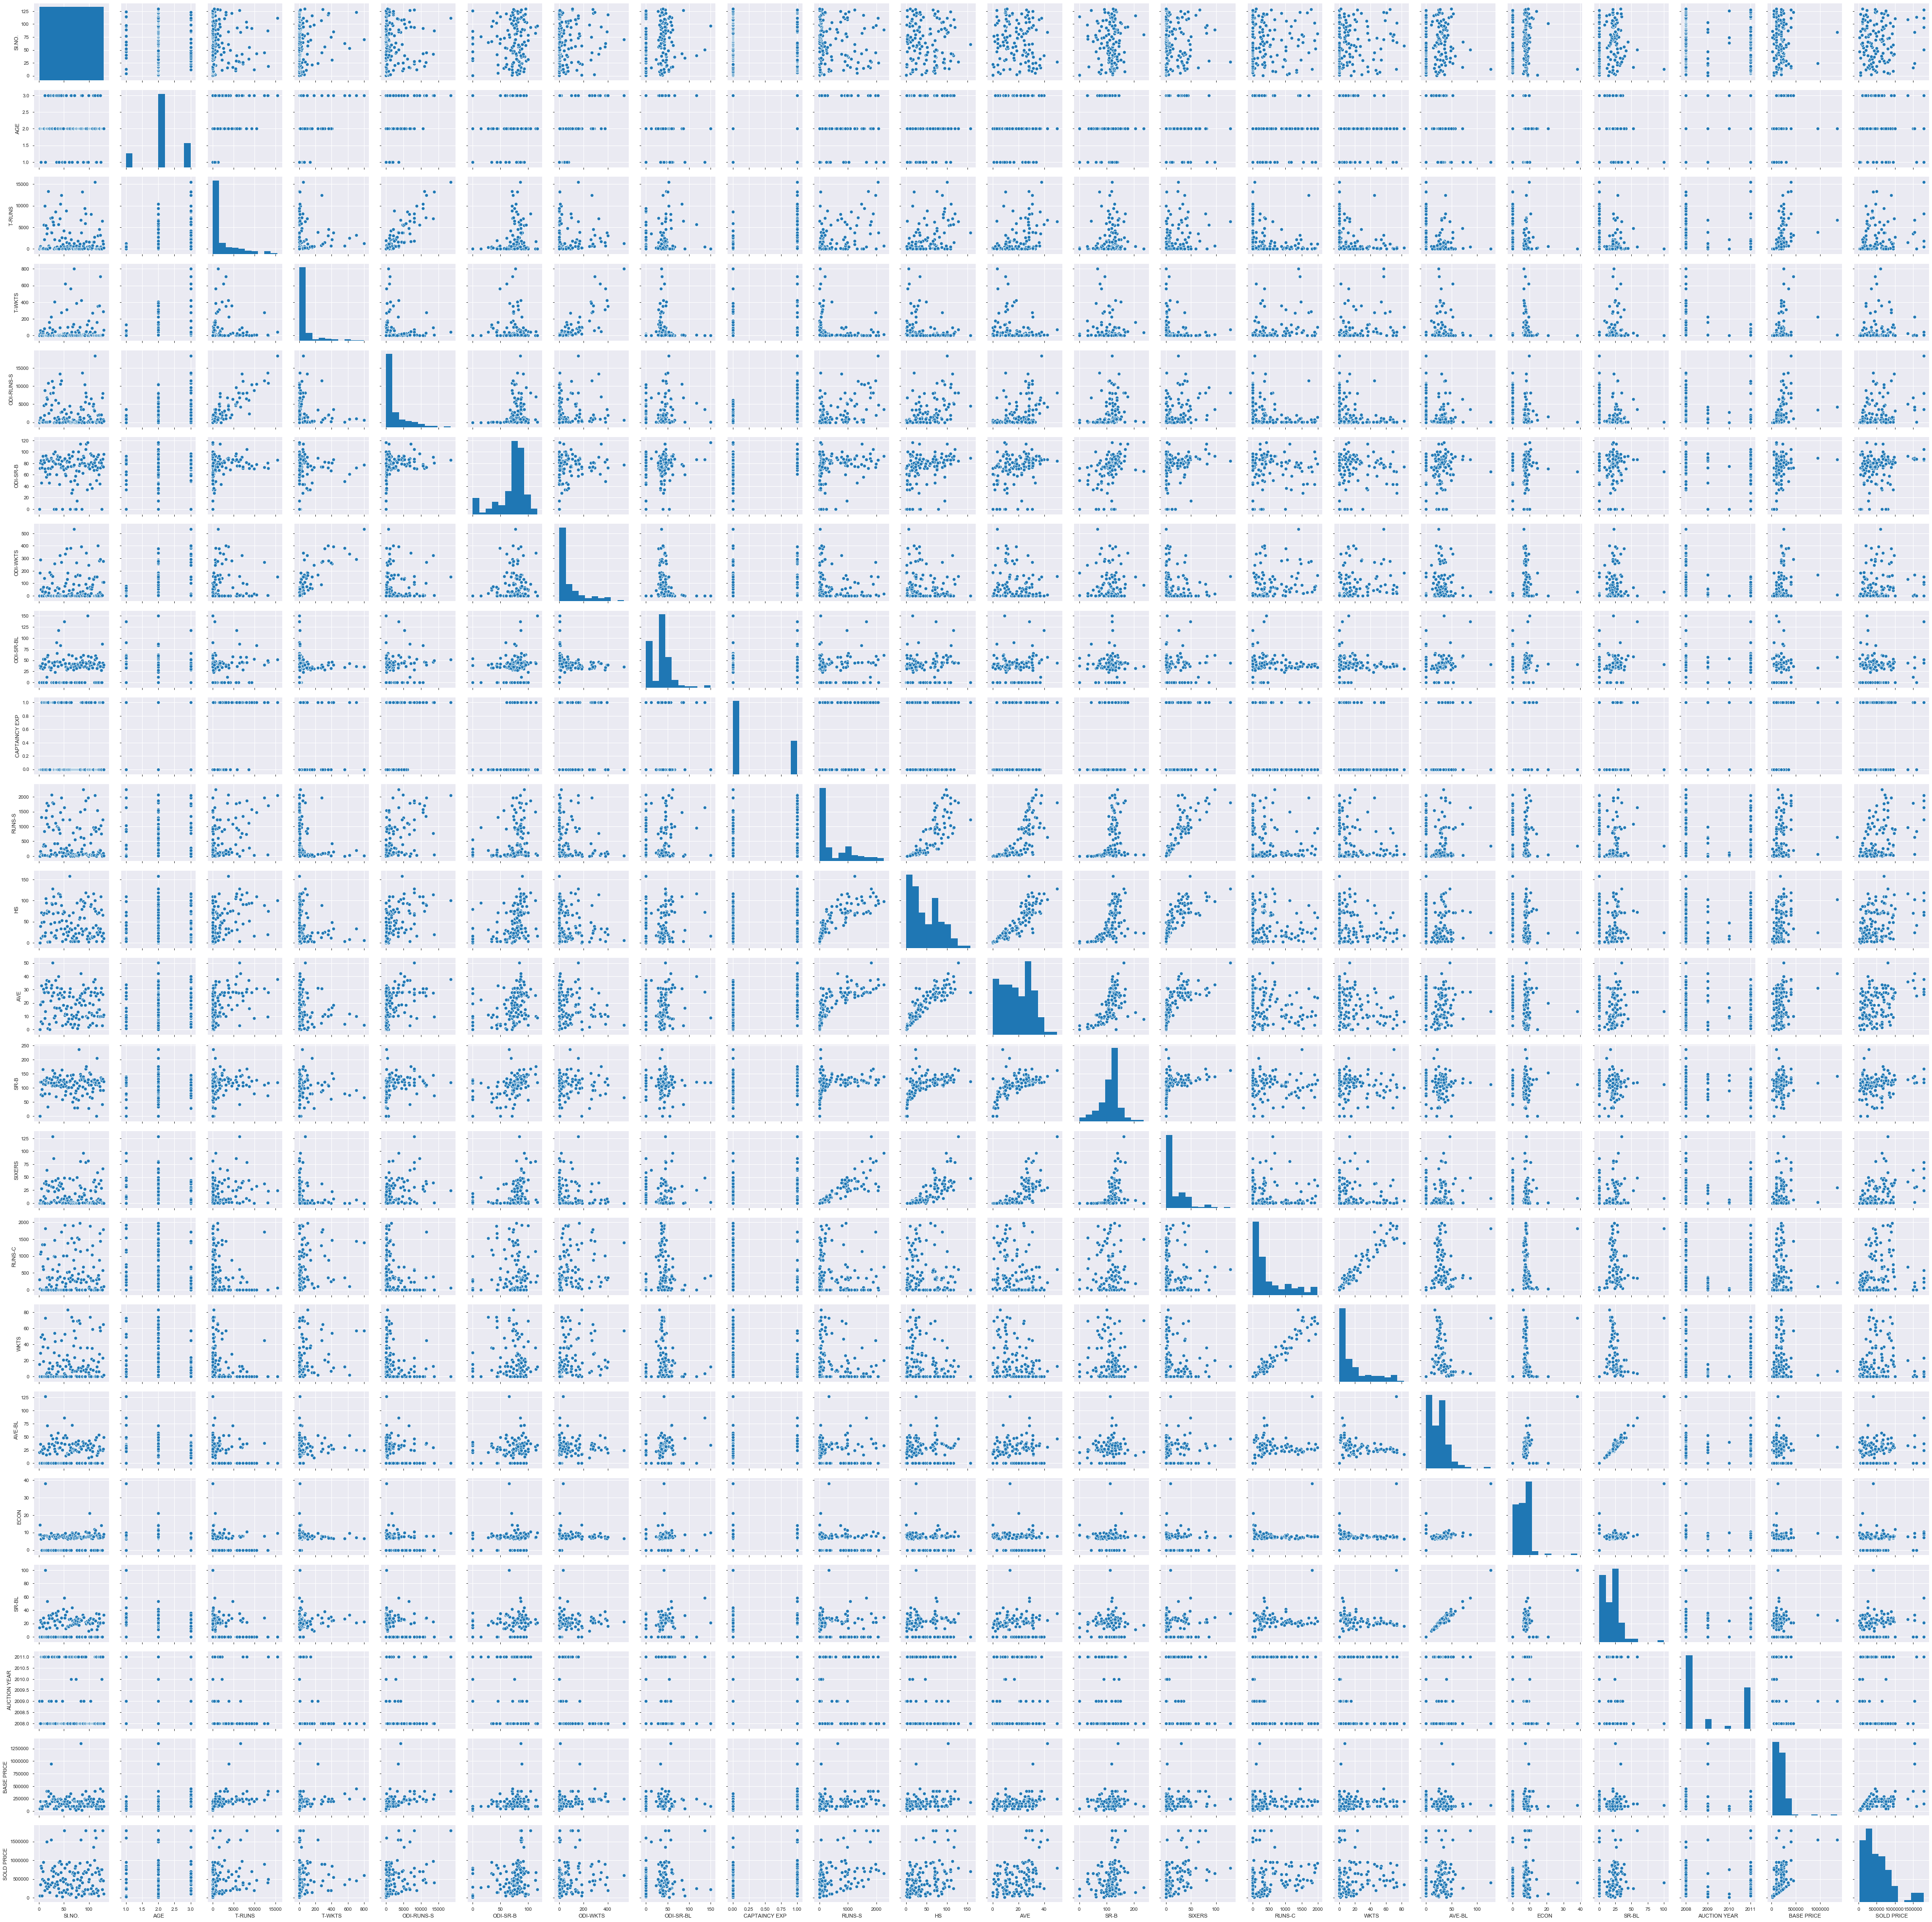

In [10]:
sns.pairplot(data)

In [11]:
data.columns

Index(['Sl.NO.', 'PLAYER NAME', 'AGE', 'COUNTRY', 'TEAM', 'PLAYING ROLE',
       'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C',
       'WKTS', 'AVE-BL', 'ECON', 'SR-BL', 'AUCTION YEAR', 'BASE PRICE',
       'SOLD PRICE'],
      dtype='object')

In [15]:
x_data=data.drop(['Sl.NO.', 'PLAYER NAME','COUNTRY', 'TEAM', 'PLAYING ROLE','AUCTION YEAR','CAPTAINCY EXP','SOLD PRICE'], axis=1)

In [16]:
x_data.head()

,AGE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,RUNS-S,HS,AVE,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,BASE PRICE
0,2,0,0,0,0.00,0,0.0,0,0,0.00,0.00,0,307,15,20.47,8.90,13.93,50000
1,2,214,18,657,71.41,185,37.6,0,0,0.00,0.00,0,29,0,0.00,14.50,0.00,50000
2,2,571,58,1269,80.62,288,32.9,167,39,18.56,121.01,5,1059,29,36.52,8.81,24.90,200000
3,1,284,31,241,84.56,51,36.8,58,11,5.80,76.32,0,1125,49,22.96,6.23,22.14,100000
4,2,63,0,79,45.93,0,0.0,1317,71,32.93,120.71,28,0,0,0.00,0.00,0.00,100000


In [17]:
y_data=data['SOLD PRICE']

In [18]:
y_data.head()

0     50000
1     50000
2    350000
3    850000
4    800000
Name: SOLD PRICE, dtype: int64

In [608]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=27)

In [609]:
lr = LinearRegression()

In [610]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [611]:
lr.coef_

array([-1.09959132e+05, -6.73614458e+01, -2.31298484e+02,  5.13942674e+01,
       -9.17185484e+02,  5.02509141e+02, -8.89403536e+02,  2.61550315e+02,
       -2.66666299e+03,  2.12160969e+03, -6.16812439e+02,  1.16340492e+03,
        3.20022496e+02, -5.06804044e+03,  4.38765347e+03, -2.00733162e+04,
       -3.57825223e+03,  1.36049693e+00])

In [612]:
lr.intercept_

581604.3471291179

In [613]:
Train_score= lr.score(x_train,y_train)
Train_score

0.5302677891850602

In [614]:
Test_score = lr.score(x_test,y_test)
Test_score

0.5377126116881182

In [615]:
new_pred = lr.predict(x_test)

In [616]:
new_pred

array([ 346664.30267783,  342842.66984156,  580348.12256815,
        381959.26262719,  699739.68786517,  638539.03213926,
        399627.50936902,  236985.37419216,  359755.61757356,
        580881.44731445,  164916.41768061,  435595.46977589,
        770292.23238148,  361570.19580239,  267355.70086865,
       1383437.32171345,  305816.07640725,  334011.91172279,
        -75513.44439768,  168504.76159536,  354471.6523059 ,
        900079.21937872,  198396.35330496,  428621.33264984,
        432610.88462722,  473937.67135705,  817693.97824984])

In [621]:
df = pd.DataFrame({'New_pred':new_pred,
                  'Actual_val':y_test})

In [622]:
df

,New_pred,Actual_val
56,3.466643e+05,225000
20,3.428427e+05,150000
30,5.803481e+05,850000
29,3.819593e+05,290000
94,6.997397e+05,675000
4,6.385390e+05,800000
98,3.996275e+05,425000
89,2.369854e+05,160000
90,3.597556e+05,100000
37,5.808814e+05,625000


In [623]:
r2_score(y_test,new_pred)

0.5377126116881182

In [627]:
x_train.to_csv('ipl_xTrain.csv')

In [628]:
y_train.to_csv('ipl_ytrain.csv')

c:\users\bhargav bollineni\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [629]:
x_test.to_csv('ipl_xtest.csv')

In [630]:
y_test.to_csv('ipl_ytest.csv')

c:\users\bhargav bollineni\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.
